<a href="https://colab.research.google.com/github/C4st3ll4n/google_colab/blob/master/analise_aluguel_cidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv("houses_to_rent_v2.csv")

In [ ]:
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
dados.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [ ]:
dados.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:
dados.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [ ]:
dados.rename(columns = {'rent amount (R$)': 'valor_aluguel'}, inplace = True)

In [ ]:
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
dados['valor_aluguel']

0         3300
1         4960
2         2800
3         1112
4          800
         ...  
10687     1478
10688    15000
10689     6000
10690    12000
10691     1400
Name: valor_aluguel, Length: 10692, dtype: int64

In [ ]:
dados['valor_aluguel'].mean()

3896.247194163861

In [ ]:
dados['valor_aluguel'].median()

2661.0

In [ ]:
dados['valor_aluguel'].std()

3408.5455176710816

In [ ]:
dados['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

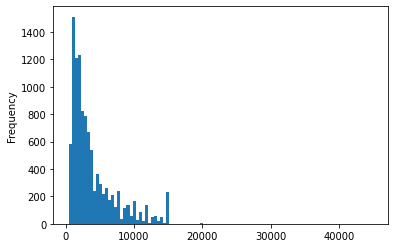

In [ ]:
dados['valor_aluguel'].plot(kind='hist', bins=100)

In [ ]:
dados.valor_aluguel.skew()

1.8388773035440982

In [ ]:
dados.valor_aluguel.kurtosis()

4.624228179818687

In [ ]:
#cidade com a media de aluguel mais alta
dados.groupby('city')['valor_aluguel'].median().reset_index().sort_values('valor_aluguel', ascending=False)

,city,valor_aluguel
4,São Paulo,3400
0,Belo Horizonte,2300
3,Rio de Janeiro,2300
2,Porto Alegre,1650
1,Campinas,1500


In [ ]:
#banheiros nos alugueis mais altos
## aluguel mais alto = valor > 5000

dados['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in dados['valor_aluguel']]


In [ ]:
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$),aluguel_alto
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,Baixo
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,Baixo
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,Baixo
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,Baixo
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,Baixo


In [ ]:
dados.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

In [ ]:
dados.groupby('aluguel_alto')['bathroom'].median()

aluguel_alto
Alto     4
Baixo    1
Name: bathroom, dtype: int64

In [ ]:
dados[['valor_aluguel', 'bathroom']].corr()

,valor_aluguel,bathroom
valor_aluguel,1.000000,0.668504
bathroom,0.668504,1.000000


In [ ]:
dados[['valor_aluguel', 'bathroom']].corr(method='spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [ ]:
dados.corr()

,area,rooms,bathroom,parking spaces,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.193796,0.226766,0.193983,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,0.193796,1.000000,0.733763,0.617510,0.007139,0.541758,0.075252,0.565148,0.134597
bathroom,0.226766,0.733763,1.000000,0.697379,0.050271,0.668504,0.109253,0.676399,0.208339
parking spaces,0.193983,0.617510,0.697379,1.000000,0.009321,0.578361,0.098378,0.597348,0.148684
hoa (R$),0.006890,0.007139,0.050271,0.009321,1.000000,0.036490,0.007627,0.029535,0.955024
valor_aluguel,0.180742,0.541758,0.668504,0.578361,0.036490,1.000000,0.107884,0.987343,0.264490
property tax (R$),0.039059,0.075252,0.109253,0.098378,0.007627,0.107884,1.000000,0.105661,0.218344
fire insurance (R$),0.188078,0.565148,0.676399,0.597348,0.029535,0.987343,0.105661,1.000000,0.254911
total (R$),0.051799,0.134597,0.208339,0.148684,0.955024,0.264490,0.218344,0.254911,1.000000


In [ ]:
import seaborn as sns

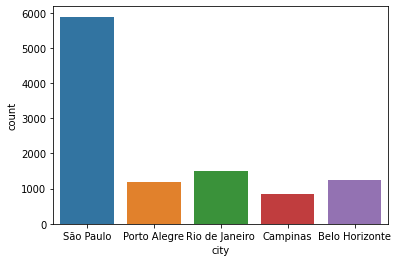

In [ ]:
sns.countplot(x='city', data=dados)

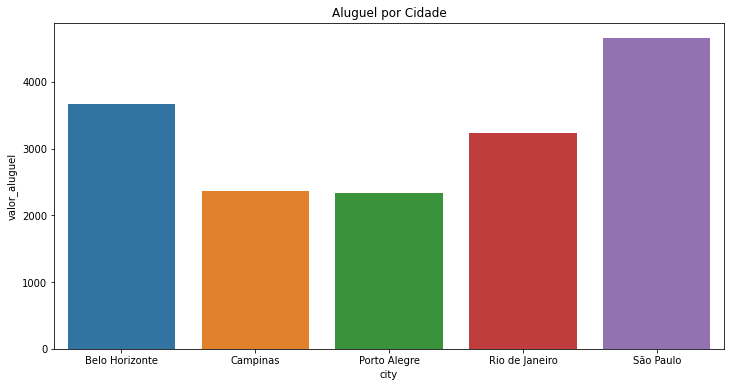

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='city', y='valor_aluguel', data=dados.groupby('city').mean().reset_index())
plt.title("Aluguel por Cidade")
plt.show()

In [ ]:
import matplotlib.pyplot as plt